In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob
from googletrans import Translator

import time
from IPython.display import clear_output
import numpy    as np
import pandas   as pd
import matplotlib.pyplot as plt
import sklearn  as skl
import pickle
import joblib


from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer


from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

print("Pandas  ", pd.__version__)
print("Sklearn ", skl.__version__) # Try to use 0.24
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score#, cross_val_score
from sklearn.model_selection import cross_val_score


from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingRegressor
from xgboost               import XGBRegressor, XGBRFRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor






Pandas   1.2.0
Sklearn  0.24.0


In [3]:
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv('daily-temperatures.csv')

In [5]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
df.shape

(3650, 2)

In [7]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


<AxesSubplot:>

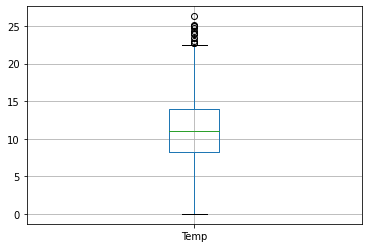

In [8]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Temp'}>]], dtype=object)

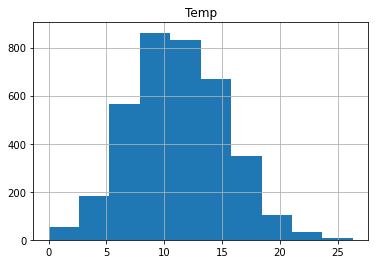

In [9]:
df.hist()

In [10]:
df1 = df.set_index('Date')

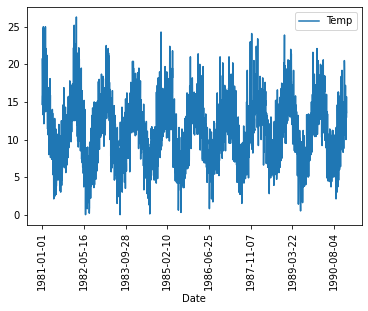

In [11]:
df1.plot(rot=90);

In [12]:
df1.index = pd.to_datetime(df1.index, format='%Y-%m-%d')

<AxesSubplot:xlabel='Date'>

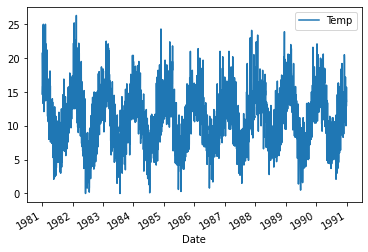

In [13]:
df1.plot()

In [14]:
df1.index#.year

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [15]:
df1

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [16]:
df1['year'] = df1.index.year

In [17]:
df1['month'] = df1.index.month

In [18]:
df1['day_of_month'] = df1.index.day

In [19]:
df1['quarter_of_year'] = df1.index.quarter

In [20]:
quarter_of_year_mean  = df1.groupby(['quarter_of_year'])['Temp'].mean()

In [21]:
df1['temp_prev_day'] = df1['Temp'].shift(1)
df1['temp_prev_2day'] = df1['Temp'].shift(2)


In [22]:
df1['mean_prev_7days'] = df1['Temp'].rolling(7, min_periods=1).mean()
df1['min_prev_7days'] = df1['Temp'].rolling(7, min_periods=1).min()
df1['max_prev_7days'] = df1['Temp'].rolling(7, min_periods=1).max()
df1['std_prev_7days'] = df1['Temp'].rolling(7, min_periods=1).std()

In [23]:
df1['mean_prev_30days'] = df1['Temp'].rolling(30, min_periods=1).mean()
df1['min_prev_30days'] = df1['Temp'].rolling(30, min_periods=1).min()
df1['max_prev_30days'] = df1['Temp'].rolling(30, min_periods=1).max()
df1['std_prev_30days'] = df1['Temp'].rolling(30, min_periods=1).std()

In [24]:
df1['quarter_of_year_mean'] = df1['quarter_of_year'].map(quarter_of_year_mean)

In [25]:
df1['is_month_start'] =   df1.index.is_month_start
df1['is_month_end'] =    df1.index.is_month_end
df1['is_quarter_start'] =   df1.index.is_quarter_start
df1['is_month_end'] = df1.index.is_month_end
df1['is_year_start'] =  df1.index.is_year_start
df1['is_month_end'] = df1.index.is_year_end

In [26]:
df1['expanding_mean'] = df1['Temp'].expanding(7).mean()


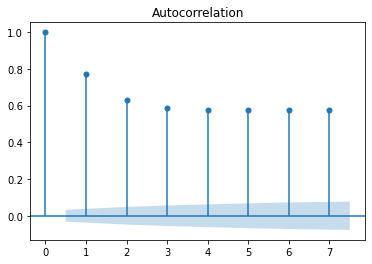

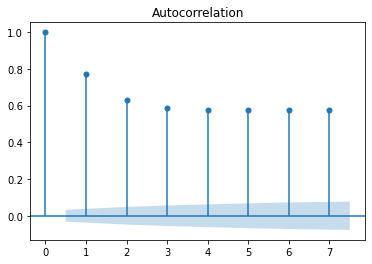

In [27]:
plot_acf(df['Temp'], lags=7)


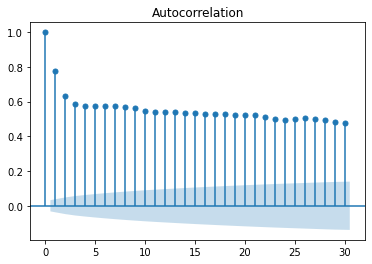

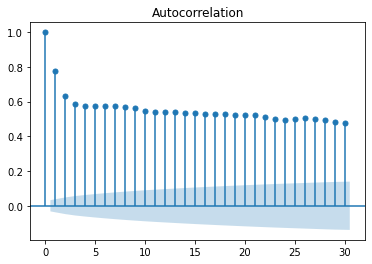

In [28]:
plot_acf(df['Temp'], lags=30)


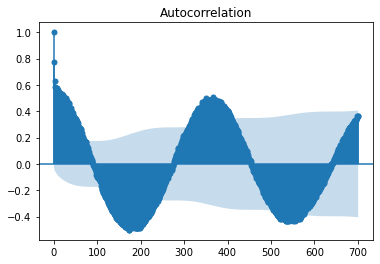

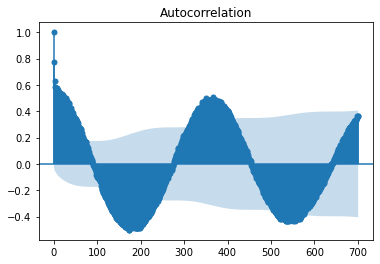

In [29]:
plot_acf(df['Temp'], lags=700)


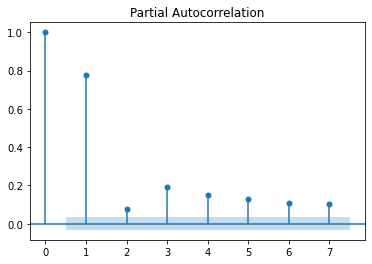

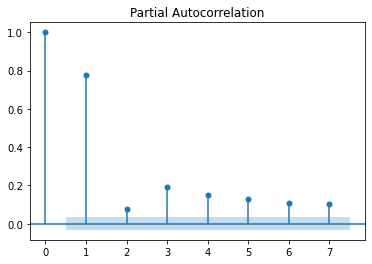

In [30]:

plot_pacf(df1['Temp'], lags=7)

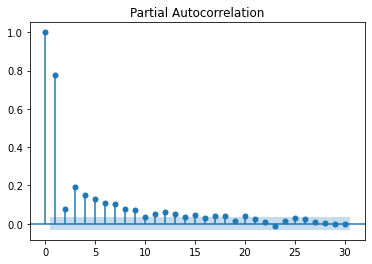

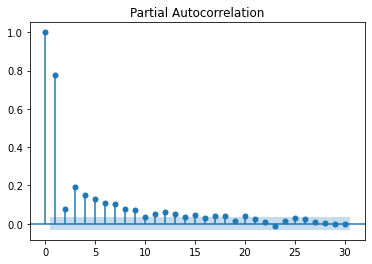

In [31]:
plot_pacf(df1['Temp'], lags=30)

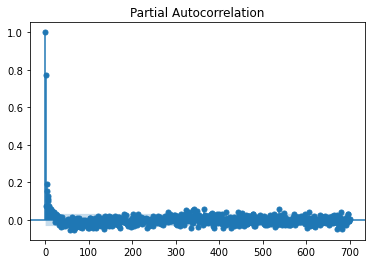

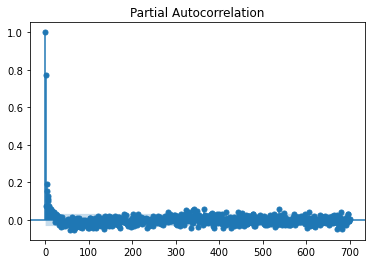

In [32]:
plot_pacf(df1['Temp'], lags=700)

In [33]:
df1['day_of_year'] = df1.index.dayofyear

In [34]:
day_of_year_mean = df1.groupby('day_of_year')['Temp'].mean()

In [35]:
df1['day_of_year_mean'] =  df1['day_of_year'].map(day_of_year_mean)

In [36]:
month_mean = df1.groupby('month')['Temp'].mean()

In [37]:
df1['month_mean'] =  df1['month'].map(month_mean)

In [38]:
df1['previous_month'] = df1['month_mean'].shift(1)

In [39]:
df1.fillna(df1.mean())

,Temp,year,month,day_of_month,quarter_of_year,temp_prev_day,temp_prev_2day,mean_prev_7days,min_prev_7days,max_prev_7days,...,quarter_of_year_mean,is_month_start,is_month_end,is_quarter_start,is_year_start,expanding_mean,day_of_year,day_of_year_mean,month_mean,previous_month
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,20.7,1981,1,1,1,11.177254,11.176014,20.700000,20.7,20.7,...,14.977938,True,False,True,True,11.444807,1,15.85,15.030323,11.177021
1981-01-02,17.9,1981,1,2,1,20.700000,11.176014,19.300000,17.9,20.7,...,14.977938,False,False,False,False,11.444807,2,15.28,15.030323,15.030323
1981-01-03,18.8,1981,1,3,1,17.900000,20.700000,19.133333,17.9,20.7,...,14.977938,False,False,False,False,11.444807,3,14.69,15.030323,15.030323
1981-01-04,14.6,1981,1,4,1,18.800000,17.900000,18.000000,14.6,20.7,...,14.977938,False,False,False,False,11.444807,4,14.04,15.030323,15.030323
1981-01-05,15.8,1981,1,5,1,14.600000,18.800000,17.560000,14.6,20.7,...,14.977938,False,False,False,False,11.444807,5,13.85,15.030323,15.030323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,1990,12,27,4,14.600000,12.900000,13.100000,10.0,14.6,...,12.207190,False,False,False,False,11.174712,361,13.60,13.851948,13.851948
1990-12-28,13.6,1990,12,28,4,14.000000,14.600000,13.171429,10.0,14.6,...,12.207190,False,False,False,False,11.175377,362,13.01,13.851948,13.851948
1990-12-29,13.5,1990,12,29,4,13.600000,14.000000,13.214286,10.0,14.6,...,12.207190,False,False,False,False,11.176014,363,13.64,13.851948,13.851948


In [40]:
df1

,Temp,year,month,day_of_month,quarter_of_year,temp_prev_day,temp_prev_2day,mean_prev_7days,min_prev_7days,max_prev_7days,...,quarter_of_year_mean,is_month_start,is_month_end,is_quarter_start,is_year_start,expanding_mean,day_of_year,day_of_year_mean,month_mean,previous_month
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-01,20.7,1981,1,1,1,NaN,NaN,20.700000,20.7,20.7,...,14.977938,True,False,True,True,NaN,1,15.85,15.030323,NaN
1981-01-02,17.9,1981,1,2,1,20.7,NaN,19.300000,17.9,20.7,...,14.977938,False,False,False,False,NaN,2,15.28,15.030323,15.030323
1981-01-03,18.8,1981,1,3,1,17.9,20.7,19.133333,17.9,20.7,...,14.977938,False,False,False,False,NaN,3,14.69,15.030323,15.030323
1981-01-04,14.6,1981,1,4,1,18.8,17.9,18.000000,14.6,20.7,...,14.977938,False,False,False,False,NaN,4,14.04,15.030323,15.030323
1981-01-05,15.8,1981,1,5,1,14.6,18.8,17.560000,14.6,20.7,...,14.977938,False,False,False,False,NaN,5,13.85,15.030323,15.030323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,1990,12,27,4,14.6,12.9,13.100000,10.0,14.6,...,12.207190,False,False,False,False,11.174712,361,13.60,13.851948,13.851948
1990-12-28,13.6,1990,12,28,4,14.0,14.6,13.171429,10.0,14.6,...,12.207190,False,False,False,False,11.175377,362,13.01,13.851948,13.851948
1990-12-29,13.5,1990,12,29,4,13.6,14.0,13.214286,10.0,14.6,...,12.207190,False,False,False,False,11.176014,363,13.64,13.851948,13.851948


In [41]:
df2 = df1.fillna(df1.mean())

<AxesSubplot:>

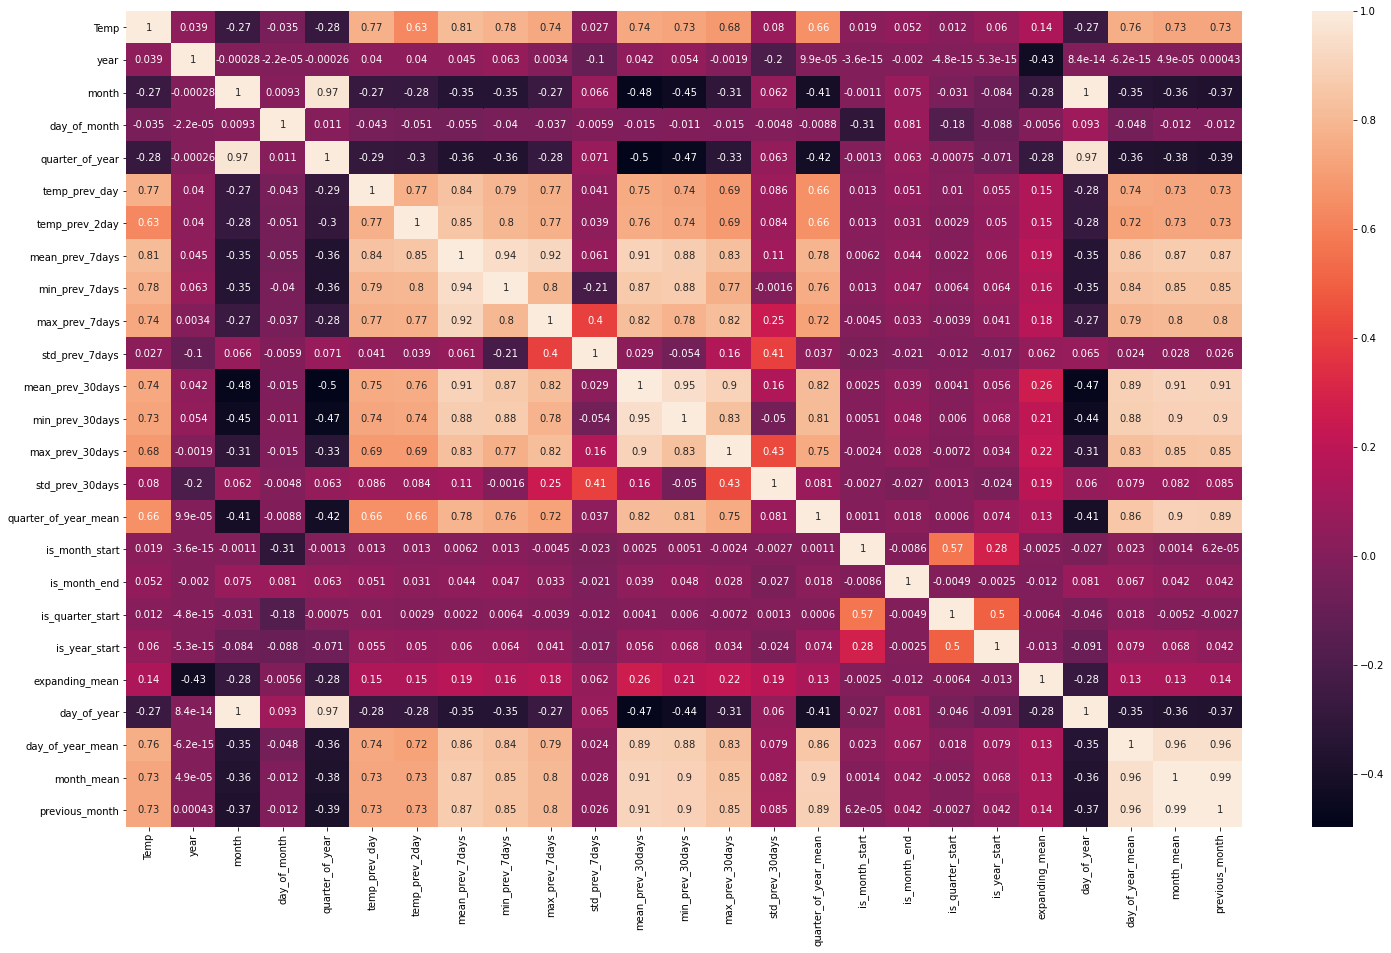

In [42]:
plt.figure(figsize=(25,15))
sns.heatmap(df2.corr(), annot=True)

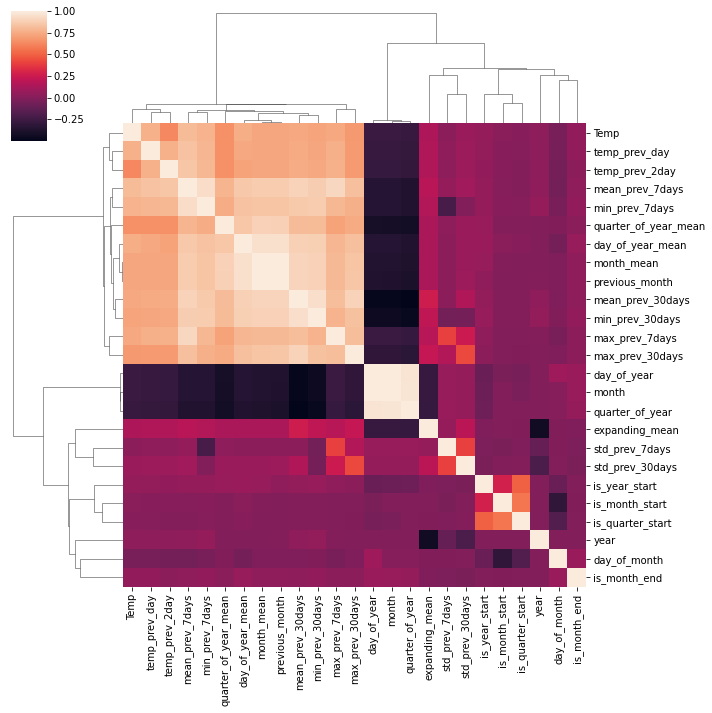

In [43]:
sns.clustermap(df2.corr())

In [59]:
val = df2.loc['1990']
train = df2.loc[:'1989']

In [60]:
X_train = train.drop('Temp', axis=1)
y_train = train['Temp']

In [61]:
X_val = val.drop('Temp', axis=1)
y_val = val['Temp']

In [47]:
val.head()

,Temp,year,month,day_of_month,quarter_of_year,temp_prev_day,temp_prev_2day,mean_prev_7days,min_prev_7days,max_prev_7days,...,quarter_of_year_mean,is_month_start,is_month_end,is_quarter_start,is_year_start,expanding_mean,day_of_year,day_of_year_mean,month_mean,previous_month
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,14.8,1990,1,1,1,12.7,14.4,13.328571,10.4,16.0,...,14.977938,True,False,True,True,11.124224,1,15.85,15.030323,13.851948
1990-01-02,13.3,1990,1,2,1,14.8,12.7,12.942857,10.4,14.8,...,14.977938,False,False,False,False,11.124886,2,15.28,15.030323,15.030323
1990-01-03,15.6,1990,1,3,1,13.3,14.8,13.271429,10.4,15.6,...,14.977938,False,False,False,False,11.126247,3,14.69,15.030323,15.030323
1990-01-04,14.5,1990,1,4,1,15.6,13.3,13.671429,10.4,15.6,...,14.977938,False,False,False,False,11.127273,4,14.04,15.030323,15.030323
1990-01-05,14.3,1990,1,5,1,14.5,15.6,14.228571,12.7,15.6,...,14.977938,False,False,False,False,11.128237,5,13.85,15.030323,15.030323


In [63]:
model = LinearRegression()


In [64]:
model.fit(X_train, y_train)


LinearRegression()

In [65]:
model.score(X_val, y_val)


0.7391934204940402

In [66]:
pred = model.predict(X_val)

In [67]:
model.score(X_train, y_train)


0.7256195394286774

In [68]:
np.sqrt(mean_squared_error(y_val, pred))

1.9693860451883864

In [69]:
r2_score(y_val, pred)

0.7391934204940402

In [55]:
linear_regressors = {
    'LinearRegression': LinearRegression(n_jobs=-1),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    #'ElasticNet':ElasticNet(),
    #'LogisticRegression': LogisticRegression(),
    #'SVC': SVC()
    
}



In [56]:
tree_regressors = {
  "Decision Tree": DecisionTreeRegressor(),
  "Extra Trees": ExtraTreesRegressor(),
  "Random Forest": RandomForestRegressor(),
  "AdaBoost": AdaBoostRegressor(),
  "Skl GBM": GradientBoostingRegressor(),
  "Skl HistGBM": HistGradientBoostingRegressor(),
  "XGBoost": XGBRegressor(verbose=0),
  "LightGBM": LGBMRegressor(),
  "CatBoost": CatBoostRegressor(verbose=0)
}



In [57]:
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True,random_state=0)
tscv = TimeSeriesSplit()
model_scores = {}
model_balanced_accuracy = {}

for model_name, model in tree_regressors.items():
    # CODE HERE

    scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print(model_name)
    print(f'The r2 score is {model.score(x_test, y_test)}')
    print(f'The average cross_val_score is {scores.mean()}')
    print(f'The RMSE is {np.sqrt(mean_squared_error(y_val, pred))}')
    print()



Decision Tree


NameError: name 'x_test' is not defined

In [ ]:

model_scores = {}
model_balanced_accuracy = {}

for model_name, model in linear_regressors.items():
    # CODE HERE
    scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    print(model_name, scores.mean())
    print(model_name, np.sqrt(mean_squared_error(y_val, pred)))
    print()



In [ ]:
df2

In [ ]:
previous_year_temp = df2.groupby([ 'year', 'day_of_month'])['Temp'].first().unstack().shift(1).stack().reset_index()

In [ ]:
previous_year_temp.rename(columns={0:'previous_year_temp'}, inplace=True)

In [ ]:
previous_year_temp.columnsyear

In [ ]:

df3 = df2.reset_index().merge(previous_year_temp, on=['year', 'day_of_month'], how='left')

In [ ]:
df3.fillna(df3.mean())

In [ ]:
train = df3.dropna()
test = df3.loc['1990']

In [ ]:
x_train = train.drop('Temp', axis=1)
y_train = train['Temp']

In [ ]:
x_test = test.drop('Temp', axis=1)
y_test = test['Temp']

In [ ]:
model1.fit(x_train, y_train)

In [ ]:
pred = model1.predict(x_test)

In [ ]:
model1.score(x_test, y_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, pred))

In [ ]:


for model_name, model in linear_regressors.items():

    scores = cross_val_score(model, x_train, y_train, cv=tscv)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(model_name)
    print(f'The r2 score is {model.score(x_test, y_test)}')
    print(f'The average cross_val_score is {scores.mean()}')
    print(f'The RMSE is {np.sqrt(mean_squared_error(y_val, pred))}')
    print()



In [ ]:
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True,random_state=0)
tscv = TimeSeriesSplit()
model_scores = {}
model_balanced_accuracy = {}

for model_name, model in tree_regressors.items():

    scores = cross_val_score(model, x_train, y_train, cv=tscv)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(model_name)
    print(f'The r2 score is {model.score(x_test, y_test)}')
    print(f'The average cross_val_score is {scores.mean()}')
    print(f'The RMSE is {np.sqrt(mean_squared_error(y_val, pred))}')
    print()

